<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [15]:
def f(x):
  return (x-50)**2

In [27]:
# generate data
import random
X = []
Y = []
label = []
for i in range(600):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)


In [28]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  global X,Y, accuracy

  r = int(len(X)*0.5)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))

    MSE += (sum1/sum0-Y_val[sample])**2

  return  MSE/(len(X)-r)

In [6]:
def d(A):
  return train_step(abs(A),30)
train_grad = grad(d)

In [7]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

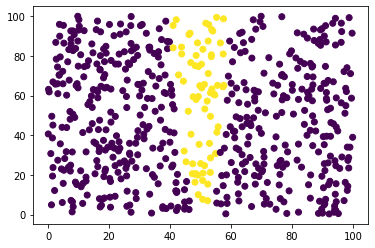

In [18]:
plt.scatter(X[:,0],X[:,1],c=Y) #xkouruankun nanshou chaojisuan xkoutttttkun ruanhuxi yanyang ttxkouhuxizhangkun huang tanxaoixoaikmaikandaoskou xkoukunyachiruantt zhege tumeicuo suoruanruanurunttkunsuoyizhendeshishukjucuolejiumaijianchaxkouxkouruanku
#xkouttxkouxueyakunnashouzhang weism wo xianzai shuffle haikeyieng jishishi random shuffleyekeyi nashismcuolexkou runhaishifenxi xkouxkou ttfaruankuneix huxi duzi nashou zang kun zheyiqieeixnkun znaghuangfaruanhuxi chajixiaiayangdaduhaishimeiulunanashismshidhouhuiuluan

In [29]:
np.random.shuffle(indexs) 
X = X[indexs]
Y = Y[indexs] 
#zhinnongyigejiuhuilunandiao tt xueyakun zhiqiqnzenmehuishiweism shuffeyicizhihoujiubuxlekun yijinglinguoyihuile

In [30]:
indexs = np.arange(len(X))


In [ ]:
#mmenshenghuangxkouniaokun ttnanshoudeiziizo walmartkunniaoduzi ttnanshouhuangttduzixueyakun zhsouzan

In [ ]:
# ruanzhendexkou buxipaitupianshidui de xueyaxueyattttindexstxueyakun numpybushuruan

In [36]:
Y#yefensankaile?
np.random.shuffle(indexs)
X_old = X[indexs]
Y_old = Y[indexs] 

In [37]:
# np.random.shuffle(indexs) #xianshuffle yebuxin jiushuom? shouzhizhang shuoming gaoluan le a meiyou shulle Y? dengdeng you a xiaminjiuyou kuzizang peng yi zixko
# X = X[indexs]
# Y = Y[indexs] 
# ruankun wulihaochaojiyun wulixkouruankun 40minlexkouniaoyangcitong diannaoexinkouke buxianshuffle yijindingkeyi shufflejiubusyachixkou
A = np.array([1.0,1.0])
losses = []
for epoches in range(300): 
  losssum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*0.1 #indexnzhengquedehuakeyiconverge
    loss = train_step(A,30) 
    losssum+=loss
    indexs=shuffle(indexs)  #xianzai you shuffle buziyebijiaoxiao 01.kunkouke sihuyouyidianidanjiang lkunzheciyoushimeiyouindex=!!!eawangjilesimalarxkouyunruanslow
    X = X_old[indexs]
    Y = Y_old[indexs] 
    # print(X[0]) #xueyameicibuyiyangzheyangshuffleyemeiwentiba
  losses.append(losssum)
  print(losssum)
 #tttkunjide jialeindexzhihou sihuhezhiqianleisi?iniaokunttkouke juetrankeyiyizhijiajiang dengdengm, doushileisi de shuxing?
 #toulimiantongkunkouke xianshuffleguoranbuxlexkoubenlaiyeluanlea zijidekeyiwhykoukeniaoxianzaixiajianghensuijile tttt kun zhiqiankeyidewhy
 #xkouyangtongkunkoukeshiqingexinyunkun nashouxkou why xianhushufefeljiubuxning Y yebushi suiji de a tttkun ttkouke xigai yijdingyouwen
#  ximianyang zhege indexs = shuffle zhege zhihou biziyangkun queshikeyixiajiang danshi suiji zhihoujiubuile whywhwykunttbizf1scrorebushi suijihoubuxin wer shi zhogduanhoubuixng?kunoukoukehzongduanhouiuhenmanle why ? chongzhile a 
# shouzhiquexueciyangxkoukun xian shuffle queshi hencha whywhywhyxtiao xlv shouyang 
# shuffle le ye xiajiangmanehenxuo ttttxkouxoukuntt
# wow jia duoshujudianhou jiashang shuffleindexzhihoumashangapply jiuxiajiangle? yebusinghenhuanman jiaosuanjiaosun kunchaojikun nashouyibiyanjiutt
#kun tt kouke bu shuffle huan man youxuxiajiang?xkouxkoukun fantan?
#  xkuoukun yexuhashiywei gailesize zhege sihuyeshi youxuxiangjiang kun xkou bushi you zhengdang yiranmeiyici dou shi xkouxkou meiyici dousihi buyiyangdea? index uyiyangle?
#  fadouxkoukunhlong shuffle meishi zhiyao index haishi youxude jiukeyi jixu?wanmeide?huangxkouzangkuneixnkouke xiaianzangxkou index szhihouyijinglunalexkou zai qu X rerbushi yuanben de jiu youchongfu xiamianyang xiamiangyang japeanese
# duxizxkou xueya jdong touton shuffle haishi butawending? xiamianyangxkou qishihenwending le bizi penshui xkouxkxoukunxtiaott xianzhaochu indexs wentifadouruankunkouek

0.31141815357480657
0.3134423164783553
0.3123248444815912
0.31133122894679016
0.31045613096267016


KeyboardInterrupt: ignored

In [ ]:
# xtiaokunkouke zhaodaole ttyangxkoukun 
#  meisyici padadaun meicyici  huxi bitiyoudaoshoushang meiyi ci doushizaizhshangmiande xiugai suoyi
#  xianzaigailehaishikeyimanmanxiajiangxueyakuneixn 
#  houmianyidaoqianmian 
# 9 1 2 3 4 5 6 7 8
# 8 9 1 2 3 4 5 6 7 

In [ ]:
np.random.shuffle(indexs) #aaaaakunkunkunkouke gaomingbao le zhegeshibufanhui de womendeshifanhuide fadoufaruankun koke suoyiwomendeqishimeigenggaiyoushizhegewentiquanhsnegruan

#ttttxueyakunttdanshikaishishuffleyiciyousmwentis

In [9]:
import matplotlib.pyplot as plt
plt.plot(losses)#xkouexyeshixiajianngde shuffle but why it effects

NameError: ignored

In [ ]:
A

array([1.6266285, 0.0403384])